## Visualizing, understanding and creating datasets

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS


## (1) Import Data

In [2]:
yelp_df = pd.read_csv('Data/yelp.csv')

In [3]:
yelp_df

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,5Yy5ednS76755mL56QMbTg,L-lg41MG7tyfdacFEn286w,8LonS_bxNmCDk3FWiG9lzA,5.0,0,0,0,"I was craving for Ramen when I found this gem,...",2018-09-03 02:03:42
1,8YYXeVAhODVfZ5USShmD7w,ybrLqhrVUr5nwN0HNv2sYw,bj-_vwEXLa7ECiHZhoOmFg,5.0,0,0,0,I had take out from here tonight so this revie...,2014-09-10 02:22:09
2,aFOU4RlMNJDQkcf5KUEp5w,w6E_bt5Bk4mHvF5k6ICdDA,lsgslT1Ho5FsFLSeCJW3fw,1.0,0,0,0,Terrible delivery service & food order was inc...,2016-08-13 00:45:31
3,yDQgyCdvWVBsBML98QerAw,mO8sN-ufvKuAbQ0vAYf1sw,yFrOuce72KhvW0LpU5FY6A,5.0,0,0,0,"I foresee this bar becoming a new local fav, g...",2018-01-21 17:59:01
4,xZqWU7ozR38ziDe8qMWWBA,4QJLIvKJbyrxm9Dv3lf_TA,4WdDY97x4GdMYtyk1KQMnw,2.0,1,0,0,There was a hair in my girlfriends rice. Staff...,2017-01-14 23:30:18
...,...,...,...,...,...,...,...,...,...
17404,GfkdjCXbSOTfRtp9BW7UYg,heSD8DBMNMW77Eqi31I9Xg,ozOneB4jXOD6hv5WBGj4KQ,5.0,3,1,2,"We have a tradition of going out for NYE Eve, ...",2022-01-01 17:26:40
17405,C8eVAR0jlxg58Dtuv4eRYA,mMK0ZqT4Y6wmu5tuwPYVxw,cFDP-1jlq2pa_BPjC-wd4g,1.0,1,1,0,Camping World is absolutely inexcusably awful!...,2021-04-17 03:28:48
17406,zYvOpBkUWW5q13awU0f9gA,Cj6dpCD9xmzZrsZ21ptG3w,-qttTkWNXN_6bQd1RrcYlQ,1.0,4,1,1,My grandfather suffered from a stoke and was r...,2019-03-27 03:50:27
17407,Ouu9caoo3zZqSu9hk5U93A,TVQlI2_rQ5iTqmHvlp6q3g,cAAtoYUKC_Z8AmSF95mjcg,4.0,2,1,1,I enjoyed the pizza and I love that they're ab...,2020-04-21 22:35:42


In [5]:
# Get the information of the dataframe

yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17409 entries, 0 to 17408
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   review_id    17409 non-null  object 
 1   user_id      17409 non-null  object 
 2   business_id  17409 non-null  object 
 3   stars        17409 non-null  float64
 4   useful       17409 non-null  int64  
 5   funny        17409 non-null  int64  
 6   cool         17409 non-null  int64  
 7   text         17409 non-null  object 
 8   date         17409 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 1.2+ MB


## (2) Visualize Data

In [7]:
# Add the length of the text

yelp_df['length'] = yelp_df['text'].apply(len)

In [8]:
yelp_df.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,length
0,5Yy5ednS76755mL56QMbTg,L-lg41MG7tyfdacFEn286w,8LonS_bxNmCDk3FWiG9lzA,5.0,0,0,0,"I was craving for Ramen when I found this gem,...",2018-09-03 02:03:42,375
1,8YYXeVAhODVfZ5USShmD7w,ybrLqhrVUr5nwN0HNv2sYw,bj-_vwEXLa7ECiHZhoOmFg,5.0,0,0,0,I had take out from here tonight so this revie...,2014-09-10 02:22:09,364
2,aFOU4RlMNJDQkcf5KUEp5w,w6E_bt5Bk4mHvF5k6ICdDA,lsgslT1Ho5FsFLSeCJW3fw,1.0,0,0,0,Terrible delivery service & food order was inc...,2016-08-13 00:45:31,155
3,yDQgyCdvWVBsBML98QerAw,mO8sN-ufvKuAbQ0vAYf1sw,yFrOuce72KhvW0LpU5FY6A,5.0,0,0,0,"I foresee this bar becoming a new local fav, g...",2018-01-21 17:59:01,243
4,xZqWU7ozR38ziDe8qMWWBA,4QJLIvKJbyrxm9Dv3lf_TA,4WdDY97x4GdMYtyk1KQMnw,2.0,1,0,0,There was a hair in my girlfriends rice. Staff...,2017-01-14 23:30:18,254


### Text

<AxesSubplot:ylabel='Frequency'>

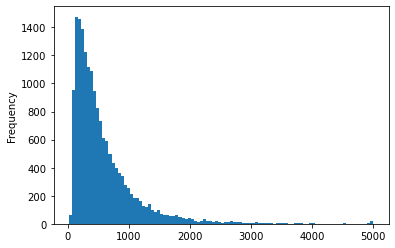

In [16]:
# Create a histogram of the frequency of lengths

yelp_df['length'].plot(bins = 100, kind = 'hist')

In [18]:
yelp_df.length.describe()

count    17409.000000
mean       576.408869
std        540.372304
min         19.000000
25%        234.000000
50%        414.000000
75%        726.000000
max       5000.000000
Name: length, dtype: float64

In [19]:
yelp_df[yelp_df['length'] == 19]['text'].iloc[0]

'Great fod selection'

In [20]:
yelp_df[yelp_df['length'] == 5000]['text'].iloc[0]

'If I could give no stars I would. read the reviews.. believe the reviews.. and run! This company is a joke, and not a very good one. Unfortunately, 3 years ago my family was in a bind to find a larger place to live with a second child on the way, we found what We thought was the perfect place to rent for our family to live and grow in. A nice small house in a nice small neighborhood with a fenced in yard for our dogs. The renting process and the reps we dealt with were super nice, but that\'s where it ends. Once you sign that lease, you sign your family up for cheap, horrible and miserable living arrangements for the next few years(thanks COVID for making moving next to impossible-until now) \n\nFirst- rent is ridiculously high and guess what?! It only goes up each year due to "market value of houses in the neighborhood " even though your wages may not go up and don\'t try to get rent the same each year due to that fact alone- they will deny you everytime. We started with $1525 in ren

### Stars

<AxesSubplot:xlabel='count', ylabel='stars'>

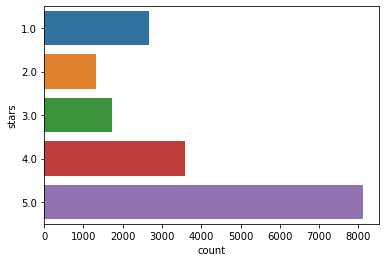

In [21]:
sns.countplot(y = 'stars', data = yelp_df)

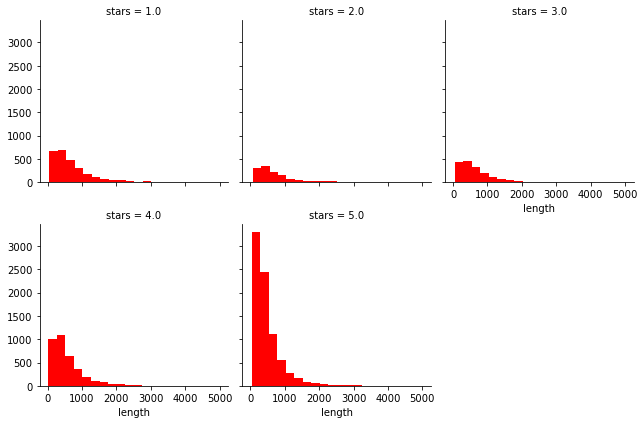

In [26]:
g = sns.FacetGrid(data = yelp_df, col = 'stars', col_wrap = 3)
g.map(plt.hist, 'length', bins = 20, color = 'r')

#### Create dataframe of

In [27]:
yelp_df_1 = yelp_df[yelp_df['stars'] == 1]

In [28]:
yelp_df_1

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,length
2,aFOU4RlMNJDQkcf5KUEp5w,w6E_bt5Bk4mHvF5k6ICdDA,lsgslT1Ho5FsFLSeCJW3fw,1.0,0,0,0,Terrible delivery service & food order was inc...,2016-08-13 00:45:31,155
28,a1O64txLCQLQi13UvjevDw,vqADkknQBSmk4ZX0Sxb8cg,encfXG_jrG1M6gX1IqrHrw,1.0,3,0,0,Loud loud loud!\n\nAnd the food sucks. They go...,2011-07-28 17:57:17,113
52,GmnRiZlUv9hj5KteCZz7fg,vHfQ28P8wpu-90rgOkuzFw,0JkPOvTyjnx2NbpYQBIkwA,1.0,0,0,0,Don't shop here! The main manager here is a to...,2014-02-06 08:44:59,850
66,ntnj5V_2-NFZnP3Q0xIJfg,MzkuXZ1b_ANnr1udeegBtg,eOeKgRKbs-iAsIEOmHTrYg,1.0,0,0,0,Why does it say online. Open 24/7 everyday but...,2017-08-31 14:48:10,201
81,qY_JIa9myCBkSY6NNvHRAw,cXQWBgjlnsMXcw7hjesATQ,0wdwwtbTGTF5SIJLmGRn3g,1.0,7,2,0,I booked a 60min therapeutic massage with a RM...,2014-04-20 03:30:47,1428
...,...,...,...,...,...,...,...,...,...,...
17400,q6h7EfySJx5RHcX6H60MEg,xc4MeLnYYdgky60XXmTzRA,IKxd95Pihw63tZhuZFGPBA,1.0,3,0,1,I am writing to express my disapproval with th...,2016-11-02 13:39:43,701
17401,FVRvT_95N1H5PXkRiLdGvw,WzhoLpHMXI59ETuQ2sRVeQ,mHY_tUZBy_0dMEcCrYNgGQ,1.0,8,5,5,Although the store I'm sure for their customer...,2021-04-02 15:33:51,1348
17403,WZr-pi2Gz7DvJS_zSdaPkQ,gd-tOvXeB3TgKAVc97a6rw,zfw03c1jP7sYkIfu1da64w,1.0,0,0,0,This place sucks. Everyone who works there is ...,2022-01-16 01:00:56,96
17405,C8eVAR0jlxg58Dtuv4eRYA,mMK0ZqT4Y6wmu5tuwPYVxw,cFDP-1jlq2pa_BPjC-wd4g,1.0,1,1,0,Camping World is absolutely inexcusably awful!...,2021-04-17 03:28:48,1868


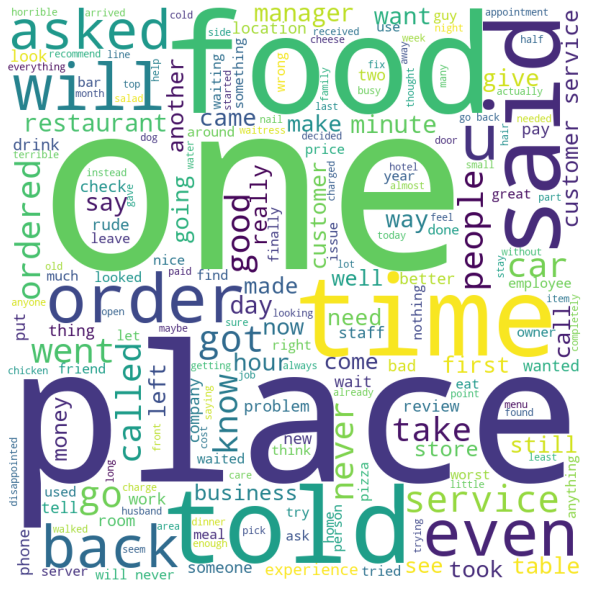

In [48]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in yelp_df_1.text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [29]:
yelp_df_5 = yelp_df[yelp_df['stars'] == 5]

In [30]:
yelp_df_5

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,length
0,5Yy5ednS76755mL56QMbTg,L-lg41MG7tyfdacFEn286w,8LonS_bxNmCDk3FWiG9lzA,5.0,0,0,0,"I was craving for Ramen when I found this gem,...",2018-09-03 02:03:42,375
1,8YYXeVAhODVfZ5USShmD7w,ybrLqhrVUr5nwN0HNv2sYw,bj-_vwEXLa7ECiHZhoOmFg,5.0,0,0,0,I had take out from here tonight so this revie...,2014-09-10 02:22:09,364
3,yDQgyCdvWVBsBML98QerAw,mO8sN-ufvKuAbQ0vAYf1sw,yFrOuce72KhvW0LpU5FY6A,5.0,0,0,0,"I foresee this bar becoming a new local fav, g...",2018-01-21 17:59:01,243
9,056dalU2iagNVtuuD6kA9g,W30YzjfRaEfcQ-vtkT1sMQ,QPwEwRE5jiOS3d8IqwxVbA,5.0,0,0,0,This is a fantastic shop. They were extremely ...,2016-09-30 19:27:34,335
11,wynFl4c8O9GRy6qAB59fBQ,Fcz9ubk_kQSigMdkkp_0sw,IBl6b1zPNo36aqV4h7vQ_w,5.0,1,0,0,Absolutely the best Chinese buffet in the stat...,2017-02-19 14:34:42,262
...,...,...,...,...,...,...,...,...,...,...
17393,DgmCesOrUY0B_OgRjN0tGQ,h7rQuTZImo4t4w00xElwvA,kxOR-Z62MnMUlCZWQmd2iQ,5.0,2,0,2,I love Ceviche. You can find parking in one of...,2020-07-10 23:13:06,847
17396,tkBiSUbbD21bHKFl5sMz5Q,5O3VvfDu_HDvgUviAqmTEA,rxy4iH0U_EeOlansz_dsNA,5.0,9,6,6,I cannot believe we did not join Freedom Boat ...,2015-10-20 20:32:16,2590
17397,3_In5MOzC8i2RwiO3uXEYw,sTY-K1aL29nUuN0lqyN-4A,e3aJelyH3GVbPF3OwOpcaw,5.0,1,0,0,Greg was great to work with from the initial p...,2016-11-08 22:16:09,245
17398,LkQ62zXCE2_mlKtVQPIwEg,WwulXySQN8t2hwqH_yWurA,XiATUgtzkuxn1IoOwFy1Wg,5.0,19,0,6,Hey friends! This spot lives up to the hype! A...,2020-08-06 21:47:24,1602


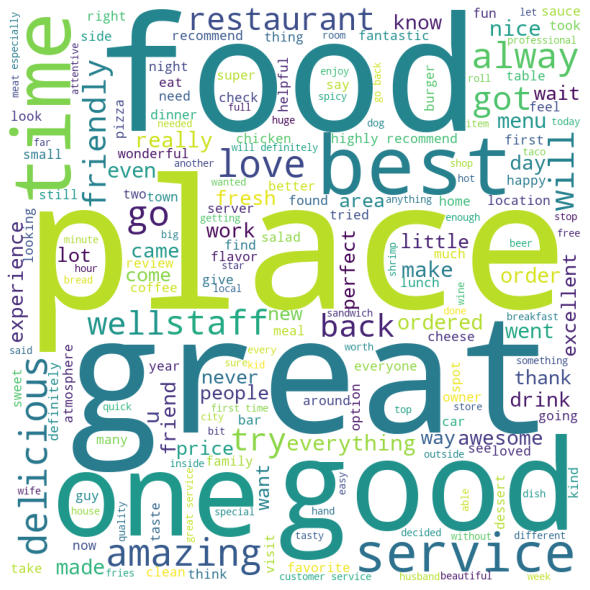

In [49]:
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in yelp_df_5.text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [31]:
yelp_df_1_5 = pd.concat([yelp_df_1, yelp_df_5])

In [32]:
yelp_df_1_5

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,length
2,aFOU4RlMNJDQkcf5KUEp5w,w6E_bt5Bk4mHvF5k6ICdDA,lsgslT1Ho5FsFLSeCJW3fw,1.0,0,0,0,Terrible delivery service & food order was inc...,2016-08-13 00:45:31,155
28,a1O64txLCQLQi13UvjevDw,vqADkknQBSmk4ZX0Sxb8cg,encfXG_jrG1M6gX1IqrHrw,1.0,3,0,0,Loud loud loud!\n\nAnd the food sucks. They go...,2011-07-28 17:57:17,113
52,GmnRiZlUv9hj5KteCZz7fg,vHfQ28P8wpu-90rgOkuzFw,0JkPOvTyjnx2NbpYQBIkwA,1.0,0,0,0,Don't shop here! The main manager here is a to...,2014-02-06 08:44:59,850
66,ntnj5V_2-NFZnP3Q0xIJfg,MzkuXZ1b_ANnr1udeegBtg,eOeKgRKbs-iAsIEOmHTrYg,1.0,0,0,0,Why does it say online. Open 24/7 everyday but...,2017-08-31 14:48:10,201
81,qY_JIa9myCBkSY6NNvHRAw,cXQWBgjlnsMXcw7hjesATQ,0wdwwtbTGTF5SIJLmGRn3g,1.0,7,2,0,I booked a 60min therapeutic massage with a RM...,2014-04-20 03:30:47,1428
...,...,...,...,...,...,...,...,...,...,...
17393,DgmCesOrUY0B_OgRjN0tGQ,h7rQuTZImo4t4w00xElwvA,kxOR-Z62MnMUlCZWQmd2iQ,5.0,2,0,2,I love Ceviche. You can find parking in one of...,2020-07-10 23:13:06,847
17396,tkBiSUbbD21bHKFl5sMz5Q,5O3VvfDu_HDvgUviAqmTEA,rxy4iH0U_EeOlansz_dsNA,5.0,9,6,6,I cannot believe we did not join Freedom Boat ...,2015-10-20 20:32:16,2590
17397,3_In5MOzC8i2RwiO3uXEYw,sTY-K1aL29nUuN0lqyN-4A,e3aJelyH3GVbPF3OwOpcaw,5.0,1,0,0,Greg was great to work with from the initial p...,2016-11-08 22:16:09,245
17398,LkQ62zXCE2_mlKtVQPIwEg,WwulXySQN8t2hwqH_yWurA,XiATUgtzkuxn1IoOwFy1Wg,5.0,19,0,6,Hey friends! This spot lives up to the hype! A...,2020-08-06 21:47:24,1602


In [33]:
yelp_df_1_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10785 entries, 2 to 17404
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   review_id    10785 non-null  object 
 1   user_id      10785 non-null  object 
 2   business_id  10785 non-null  object 
 3   stars        10785 non-null  float64
 4   useful       10785 non-null  int64  
 5   funny        10785 non-null  int64  
 6   cool         10785 non-null  int64  
 7   text         10785 non-null  object 
 8   date         10785 non-null  object 
 9   length       10785 non-null  int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 926.8+ KB


In [37]:
print('1-Stars Review Percentage = ', (len(yelp_df_1)/len(yelp_df_1_5))*100, '%')

1-Stars Review Percentage =  24.738062123319427 %


In [50]:
print('5-Stars Review Percentage = ', (len(yelp_df_5)/len(yelp_df_1_5))*100, '%')

5-Stars Review Percentage =  75.26193787668058 %


/opt/anaconda3/envs/dev/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='stars', ylabel='count'>

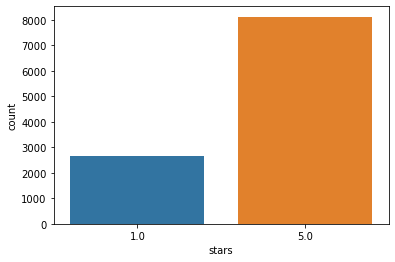

In [42]:
sns.countplot(yelp_df_1_5['stars'], label = 'Count')

In [44]:
%store yelp_df_1_5

Stored 'yelp_df_1_5' (DataFrame)


In [45]:
# For streamlit
yelp_df_1_5.to_csv('yelp_df_1_5.csv', index=False)
